# Importing relevant libraries 

In [1]:
import seaborn as sns
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import pandas as pd2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Answer 1: Correlation Heat Map between relevant parameters

C:\Users\Rohan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Minimum Correlation Value:
-0.99834177785
Maximum Correlation Value:
1.0


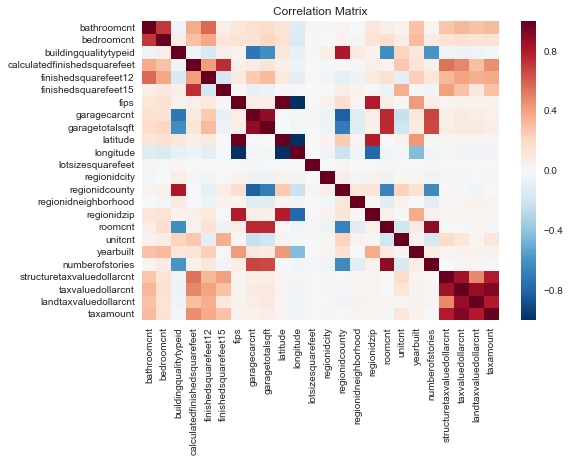

In [167]:
#Reading from properties_2016.csv
properties_features=['bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15','fips','garagecarcnt','garagetotalsqft','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidneighborhood','regionidzip','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']
properties_data=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\properties_2016.csv")
#setting all empty values to 0
for i in properties_features:
    properties_data[i].fillna(0,inplace=True)


correlation_matrix=[[] for i in range(24)]
k=0
l=0
for i in properties_features:
    for j in properties_features:
        correlation_value=properties_data[i].corr(properties_data[j],method='pearson')
        correlation_matrix[k].append(correlation_value)
    k=k+1
    
#generating correlation matrix
correlation_dataframe=pd.DataFrame(correlation_matrix,index=properties_features,columns=properties_features)
#print(correlation_dataframe)
min_pair = (0, 0)
min_value=0
for i in correlation_dataframe:
    if correlation_dataframe[i].min() < min_value:
        min_pair = (correlation_dataframe[i].idxmin(), i)
print("Minimum Correlation Value:")
print(correlation_dataframe.min().min())
#print(min_pair)


print("Maximum Correlation Value:")
print(correlation_dataframe.max().max())
ax = plt.axes()
sns.heatmap(correlation_dataframe, vmin=-1, vmax=1,center=0,ax = ax)
ax.set_title('Correlation Matrix')
sns.plt.show()




        

Between all the relevant pair of variables

    Most positive correlation value: between :0.928343               
    Most negative correlation value: between : -0.99834177785

# Answer 2: Plots revealing aspects of this data

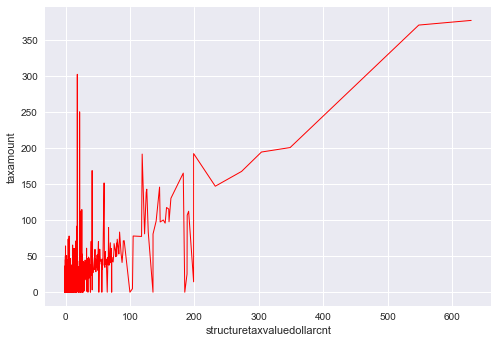

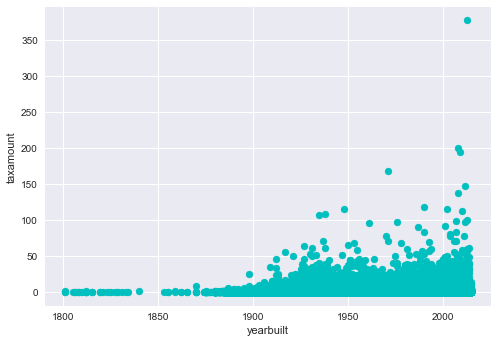

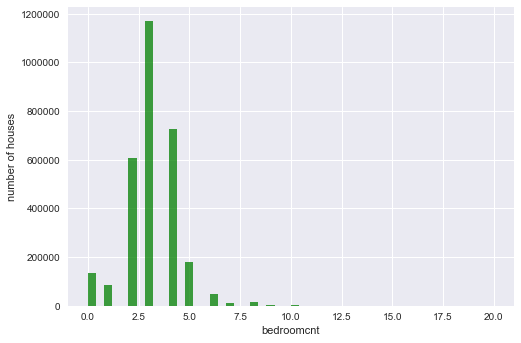

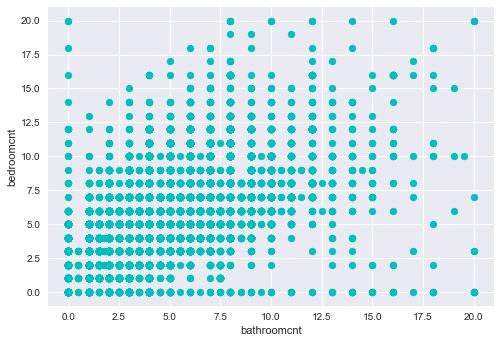

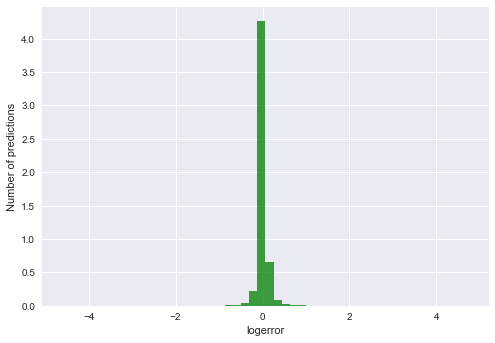

In [166]:
#builds = np.array([1])
list=['parcelid','bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15','fips','garagecarcnt','garagetotalsqft','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidneighborhood','regionidzip','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']


#Reading from properties_2016.csv
file=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\properties_2016.csv",usecols=list)
file_org=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\properties_2016.csv",usecols=list)

#Reading from train_2016_v2.csv
train_data=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\train_2016_v2.csv", usecols=train_features)

#merging two files on the key parcelid
properties_train=pd.merge(file,train_data,on='parcelid',copy=True, indicator=False)
for i in list:
    file_org[i].fillna(0,inplace=True)
    #file_org[i].fillna(0,inplace=True)
    #file[i] = (file[i] - file[i].mean())/file[i].std()

#setting empty values to 0 and normazlization
for i in list:
    if i!='yearbuilt' and i!='logerror':
        file[i].fillna(0,inplace=True)
        properties_train[i].fillna(0,inplace=True)
        if i!='bedroomcnt' and i!='bathroomcnt' and i!='yearbuilt' and i!='regionidzip' and i!='logerror':
            #file[i].fillna(0,inplace=True)
            #file_org[i].fillna(0,inplace=True)
            file[i] = (file[i] - file[i].mean())/file[i].std()
            #properties_train[i].fillna(0,inplace=True)
            properties_train[i] = (properties_train[i] - properties_train[i].mean())/properties_train[i].std()
        
        
        
file1 = file.sort_values(['structuretaxvaluedollarcnt'])
file2 = file.sort_values(['calculatedfinishedsquarefeet'])


#generating plots

#Line plot structuretaxvaluedollarcnt vs taxamount
plt.xlabel('structuretaxvaluedollarcnt')
plt.ylabel('taxamount')
plt.plot(file1['structuretaxvaluedollarcnt'], file1['taxamount'], label='Component 1', linewidth=1.0 , color='r')
plt.show()


'''#fig = plt.figure(figsize=(11,8))
#ax1 = fig.add_subplot(111)
plt.xlabel('calculatedfinishedsquarefeet')
plt.ylabel('taxamount')
plt.plot(file2['calculatedfinishedsquarefeet'], file2['taxamount'], label='Component 1', linewidth=1.0 , color='r')
plt.show()
'''
#scatter plot yearbuilt vs taxamount
plt.xlabel('yearbuilt')
plt.ylabel('taxamount')
plt.scatter(file['yearbuilt'], file['taxamount'], label='Component 1', color='c')
plt.show()

#histrogram bedroomcnt vs number of houses
plt.xlabel('bedroomcnt')
plt.ylabel('number of houses')
plt.hist(file['bedroomcnt'],bins=50, facecolor='green', alpha=0.75)
plt.show()

#scatter plot bathroomcnt vs bedroomcnt
plt.xlabel('bathroomcnt')
plt.ylabel('bedroomcnt')
plt.scatter(file['bathroomcnt'], file['bedroomcnt'], label='Component 1', color='c')
plt.show()

#histogram logerror
plt.xlabel('logerror')
plt.ylabel('Number of predictions')
plt.hist(properties_train['logerror'],50, normed=1, facecolor='g', alpha=0.75)
plt.show()

Plot 1: Plot line between normalized "Tax amount" and "Structure value dollar count" shows a linear relationship on a higher level which signfies that he total property tax assessed for a assessment year increases linearly with an increase in the assessed value of the built structure on given parcel 

Plot 2: Scatter plot between normalized "Tax amount" and "Year built" shows that as time passes, the total tax assessed on a property in a given year increases and also that over time, number of houses built in a year has increased

Plot 3: Histogram between "Number of houses" and "Bedroom count" shows how many houses have a certain number of bedrooms. This plot tells us that most of the houses assessed have 3 bedrooms

Plot 4: Scatter plot between "Bedroom count" and "Bathroom count" shows the discrete relationship between these indenpendent parameters and shows the most popular combinations of the two

Plot 5: Histogram of "Log error" shows the number of predictions per log error value. This plot follows the normal distribution with a peak near zero values

# Answer 3: Simple Linear Regression

In [168]:
#properties_features=['taxvaluedollarcnt','taxamount','bedroomcnt','parcelid']

properties_features=['parcelid','bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15','fips','garagecarcnt','garagetotalsqft','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidneighborhood','regionidzip','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']

train_features=['parcelid','logerror']
i=0

#Reading from properties_2016.csv
properties_data=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\properties_2016.csv",usecols=properties_features)

#Reading from train_2016_v2.csv
train_data=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\train_2016_v2.csv", usecols=train_features)


#replacing empty values with 0 and normalization
for i in properties_features:
    if i !='parcelid':
        properties_data[i].fillna(0,inplace=True)
        properties_data[i] = (properties_data[i] - properties_data[i].mean())/properties_data[i].std()
        
#merging two files on the key parcelid
properties_train=pd.merge(properties_data,train_data,on='parcelid',copy=True, indicator=False)

properties_train_data = properties_train[['bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15','fips','garagecarcnt','garagetotalsqft','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidneighborhood','regionidzip','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']].copy()
properties_train_logerror=properties_train[['logerror']].copy()

#dividing data into training and testing data
X_train=properties_train_data[:60000]
X_test=properties_train_data[60000:]
y_train =properties_train_logerror[:60000]
y_test = properties_train_logerror[60000:]
regr = linear_model.LinearRegression()

#traning LR model
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error LR: %.9f"
      % mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score LR: %.9f' % r2_score(y_test,y_pred))

Coefficients: 
 [[-0.00426658  0.00103633 -0.00121749  0.00359446  0.01018376  0.01110453
   0.06284957 -0.00153488 -0.00293837 -0.00412104  0.05443321  0.00316434
  -0.00040119  0.00289668 -0.00124799 -0.00286216  0.00016359 -0.00089746
  -0.00147543  0.00048029  0.01459058  0.01121441  0.0051746  -0.03089299]]
Mean squared error LR: 0.025683040
Variance score LR: 0.003890719


It gives a mean squared error of 0.025683040 and r2 variance score of 0.003890719. It performs the best amongst the LR, KNN, Adaboost, Random forests in terms of these 2 parameters and "fips" proves to be the most important feature according to the regression coeficients with a coeficient of 0.06284957 

# Answer 4: Advanced Linear Regression, KNN, Random Forest, AdaBoost

In [148]:
#properties_features=['taxvaluedollarcnt','taxamount','bedroomcnt','parcelid']
properties_features=['parcelid','bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15','fips','garagecarcnt','garagetotalsqft','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidneighborhood','regionidzip','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']

train_features=['parcelid','logerror']
i=0
#Reading from properties_2016.csv
properties_data=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\properties_2016.csv",usecols=properties_features)

#Reading from train_2016_v2.csv
train_data=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\train_2016_v2.csv", usecols=train_features)

#replacing empty values with mean and normalization
for i in properties_features:
    if i !='parcelid':
        properties_data[i].fillna(properties_data[i].mean(),inplace=True)
        properties_data[i] = (properties_data[i] - properties_data[i].mean())/properties_data[i].std()
        
#merging two files on the key parcelid
properties_train=pd.merge(properties_data,train_data,on='parcelid',copy=True, indicator=False)
properties_train_data = properties_train[['bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15','fips','garagecarcnt','garagetotalsqft','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidneighborhood','regionidzip','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']].copy()
properties_train_logerror=properties_train[['logerror']].copy()

#dividing data into training and testing data
X_train=properties_train_data[:60000]
X_test=properties_train_data[60000:]
y_train =properties_train_logerror[:60000]
y_test = properties_train_logerror[60000:]

#training the 4 models
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("Mean squared error LR: %.9f" % mean_squared_error(y_test,y_pred))
print('Variance score LR: %.9f' % r2_score(y_test,y_pred))

neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train, y_train) 
y_pred=neigh.predict(X_test)
print("Mean squared error KNN: %.9f" % mean_squared_error(y_test,y_pred))
print('Variance score KNN: %.9f' % r2_score(y_test,y_pred))

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print("Mean squared error Random Forest: %.9f" % mean_squared_error(y_test,y_pred))
print('Variance score Random Forest: %.9f' % r2_score(y_test,y_pred))

regr = AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
print("Mean squared error AdaBoost: %.9f" % mean_squared_error(y_test,y_pred))
print('Variance score AdaBoost: %.9f' % r2_score(y_test,y_pred))

Mean squared error LR: 0.025694808
Variance score LR: 0.003434294
Mean squared error KNN: 0.045762832
Variance score KNN: -0.774898220


C:\Users\Rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean squared error Random Forest: 0.025703231
Variance score Random Forest: 0.003107617


C:\Users\Rohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error AdaBoost: 0.048003035
Variance score AdaBoost: -0.861783839


After filling the missing values with mean and normalizing each column using Z-normalization, Advanced LR proves to be the best in terms of the least mean squared error of 0.025694808

# Answer 5: Creating Submission files for LR, Random Forest, KNN, Adaboost regressions

In [152]:
#prop_features=['taxvaluedollarcnt','taxamount','bedroomcnt','parcelid']
prop_features=['parcelid','bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15','fips','garagecarcnt','garagetotalsqft','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidneighborhood','regionidzip','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']

train_features=['parcelid','logerror']
i=0

#Reading from properties_2016.csv
properties_data=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\properties_2016.csv",usecols=prop_features)

#Reading from train_2016_v2.csv
train_data=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\train_2016_v2.csv",usecols=train_features)
sample_data=pd.read_csv("C:\\Users\\Rohan\\Desktop\\DSF\\sample_submission.csv")
sample_data.columns = [c.lower() for c in sample_data.columns]

#replacing empty values with mean and normalization
for i in prop_features:
    if i !='parcelid':
        properties_data[i].fillna(properties_data[i].mean(),inplace=True)
        properties_data[i] = (properties_data[i] - properties_data[i].mean())/properties_data[i].std()

#merging files on column parcelid
prop_sample_join=pd.merge(properties_data,sample_data,on='parcelid',copy=True, indicator=False,how='inner')
prop_train_join=pd.merge(properties_data,train_data,on='parcelid',copy=True, indicator=False,how='inner')
prop_train_join_data = properties_train[['bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15','fips','garagecarcnt','garagetotalsqft','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidneighborhood','regionidzip','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']].copy()

prop_train_join_data_logerror=prop_train_join[['logerror']].copy()
#prop_sample_join_data=prop_sample_join[['taxvaluedollarcnt', 'bedroomcnt','taxamount']].copy()
prop_sample_join_data = prop_sample_join[['bathroomcnt','bedroomcnt','buildingqualitytypeid','calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet15','fips','garagecarcnt','garagetotalsqft','latitude','longitude','lotsizesquarefeet','regionidcity','regionidcounty','regionidneighborhood','regionidzip','roomcnt','unitcnt','yearbuilt','numberofstories','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']].copy()


#dividing data into training and testing data
X_train=prop_train_join_data[:60000]
X_test=prop_sample_join_data

y_train =prop_train_join_data_logerror[:60000]

#training all the models
regr = AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
regr.fit(X_train, y_train)
y_pred_adda=regr.predict(X_test)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred_forest=regr.predict(X_test)

neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train, y_train) 
y_pred_knn=neigh.predict(X_test)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_LR = regr.predict(X_test)

#populating submission files for all the models
submission_features=['parcelid','201610','201611','201612','201710','201711','201712']
submission_adda = pd.DataFrame(columns=submission_features)
submission_forest = pd.DataFrame(columns=submission_features)
submission_knn = pd.DataFrame(columns=submission_features)
submission_LR = pd.DataFrame(columns=submission_features)
for j in submission_features:
    if j=='parcelid':
        submission_adda[j]=prop_sample_join['parcelid']
        submission_forest[j]=prop_sample_join['parcelid']
        submission_knn[j]=prop_sample_join['parcelid']
        submission_LR[j]=prop_sample_join['parcelid']
    else:
        submission_adda[j]=y_pred_adda
        submission_forest[j]=y_pred_forest
        submission_knn[j]=y_pred_knn
        submission_LR[j]=y_pred_LR

submission_adda.to_csv('C:\\Users\\Rohan\\Desktop\\DSF\\rohan_adda.csv', index=False)
submission_forest.to_csv('C:\\Users\\Rohan\\Desktop\\DSF\\rohan_forest.csv', index=False)
submission_knn.to_csv('C:\\Users\\Rohan\\Desktop\\DSF\\rohan_knn.csv', index=False)
submission_LR.to_csv('C:\\Users\\Rohan\\Desktop\\DSF\\rohan_LR.csv', index=False)


C:\Users\Rohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


•	The Zillow scores were as follows:
    o	Random Forest- 0.0649976
    o	LR- 0.0652012
    o	KNN- 0.1027224
    o	AdaBoost- 0.1125407
•	The final rank was 2238
